## PROJECT : HOUSE PRICE PREDICTION BY USING LINEAR REGRESSION ALGORITHM

In this project, we aim to predict house prices using a dataset containing various features such as square footage, number of bedrooms and bathrooms, and location details. By employing machine learning techniques like linear regression, we endeavor to analyze and forecast house prices, aiding in real estate decision-making and market understanding.

### IMPORTING LIBRARIES

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATASET

In [44]:
df=pd.read_csv('house prices.csv')
df 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### BASIC INFORMATION OF DATASET

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [46]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [47]:
df.shape

(4600, 18)

### CHECKING THE NULL VALUES

In [48]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### STATISTICAL INFORMATION OF THE DATASET

In [49]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [50]:
df['price'].value_counts().head()

0.0         49
300000.0    42
400000.0    31
440000.0    29
450000.0    29
Name: price, dtype: int64

In [51]:
df['price'].replace(0, np.nan, inplace=True)
df['price'].replace(np.nan, df['price'].mean(), inplace=True)

In [52]:
df['price'].value_counts()

5.579059e+05    49
3.000000e+05    42
4.000000e+05    31
4.400000e+05    29
4.500000e+05    29
                ..
6.846800e+05     1
6.099000e+05     1
1.635000e+06     1
1.339000e+06     1
2.206000e+05     1
Name: price, Length: 1741, dtype: int64

In [53]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.208126,0.336087,0.439775,0.051186,0.152011,0.143140,0.237252,0.038566,0.375239,0.215616,0.021661,-0.028879
bedrooms,0.208126,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.336087,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.439775,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.051186,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.152011,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.143140,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.237252,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.038566,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.375239,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


### SEPARATING TARGETS AND FEATURES COLUMNS

In [54]:
x=df.drop(columns=['price'])
x.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [55]:
y=df['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [56]:
x.drop(columns=['country'], inplace=True)

## Outliers

<Axes: xlabel='price'>

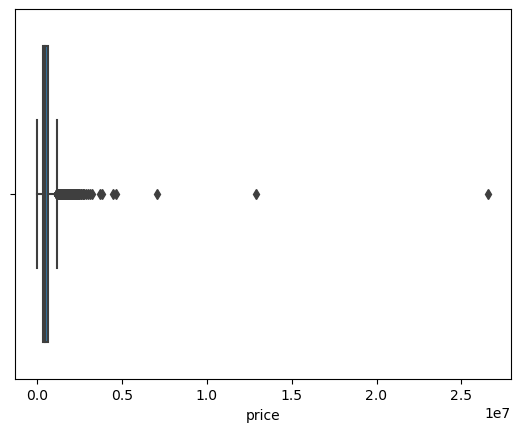

In [57]:
sns.boxplot(data=x,x=y)

<Axes: >

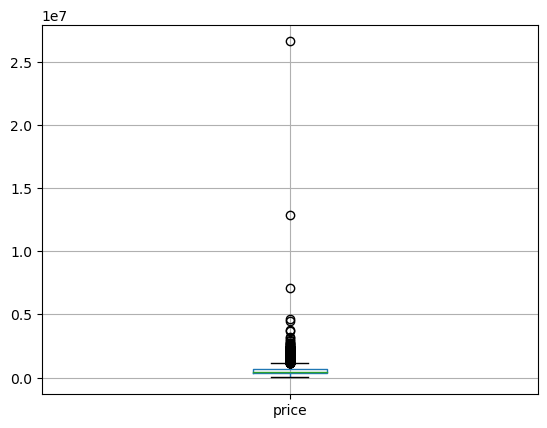

In [58]:
df[["price"]].boxplot()

In [59]:
# using Quartile method

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Interquartile range (IQR)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering rows where the price is outside the bounds
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

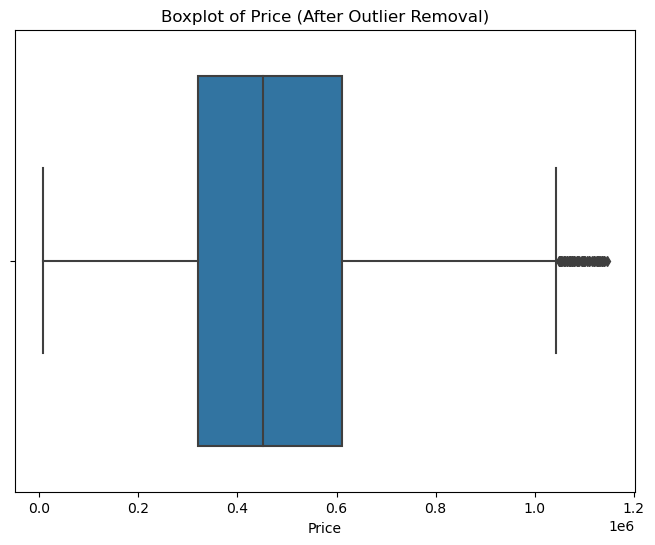

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['price'])
plt.title('Boxplot of Price (After Outlier Removal)')
plt.xlabel('Price')
plt.show()

## Skewness

In [61]:
col=x.select_dtypes(['int','float']).columns
col

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [62]:
from scipy.stats import skew

In [63]:
skew(df['price'])

25.149877773829477

bedrooms
0.4562977782417167


<Figure size 640x480 with 0 Axes>

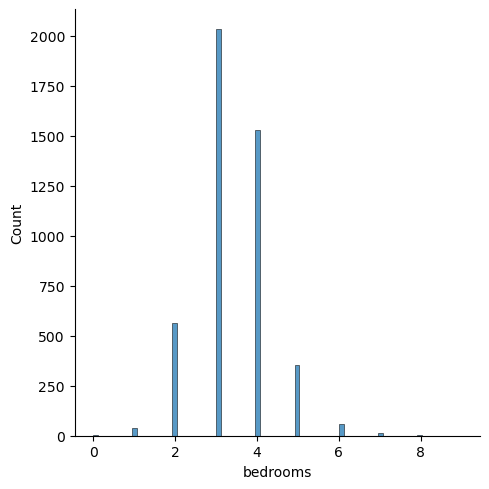

bathrooms
0.615831824916563


<Figure size 640x480 with 0 Axes>

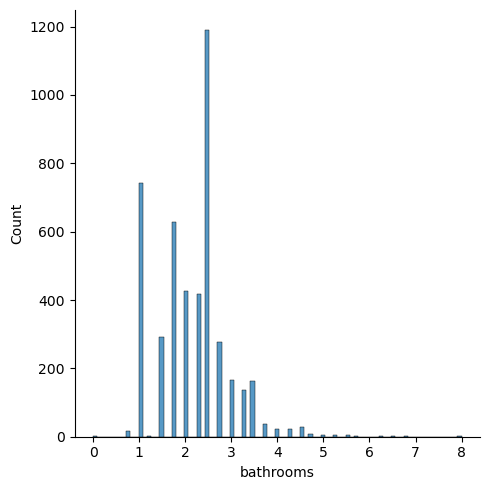

sqft_living
1.722951204510254


<Figure size 640x480 with 0 Axes>

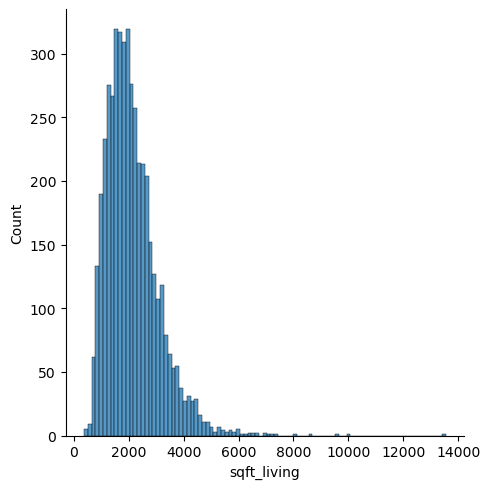

sqft_lot
11.303451304292855


<Figure size 640x480 with 0 Axes>

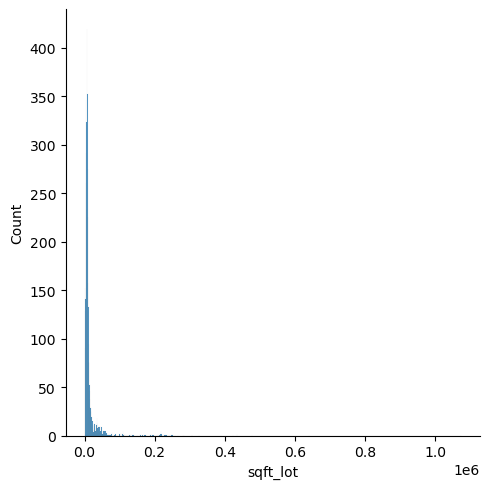

floors
0.5512608124564405


<Figure size 640x480 with 0 Axes>

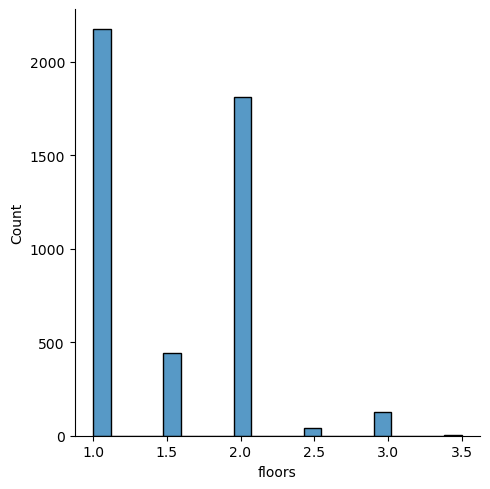

waterfront
11.679090938248779


<Figure size 640x480 with 0 Axes>

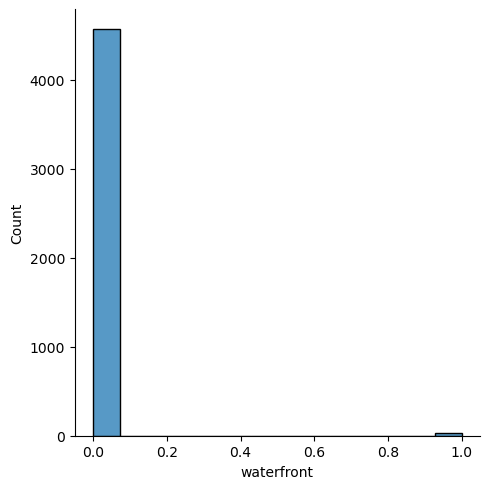

view
3.340496634225867


<Figure size 640x480 with 0 Axes>

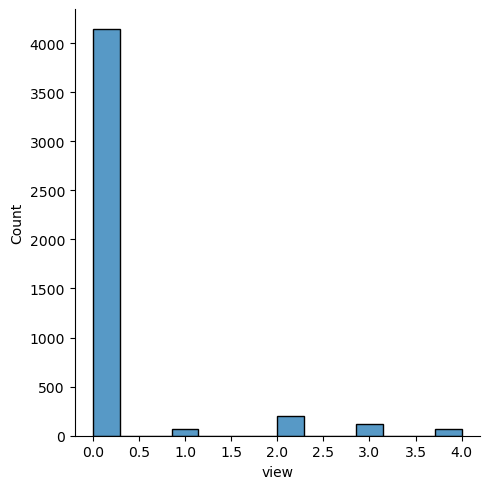

condition
0.9587548957132611


<Figure size 640x480 with 0 Axes>

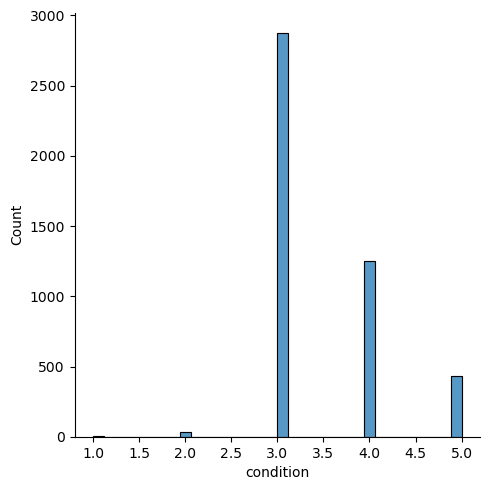

sqft_above
1.4937234612067187


<Figure size 640x480 with 0 Axes>

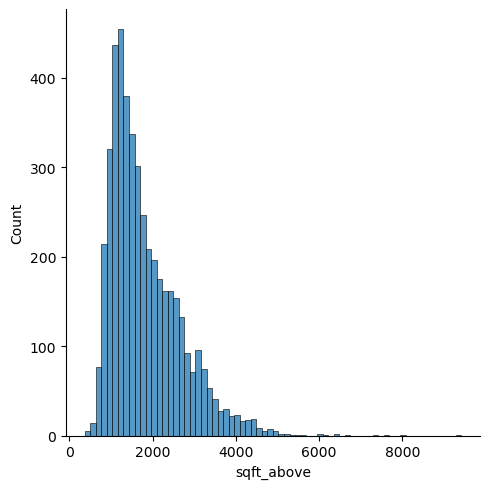

sqft_basement
1.6421964701472302


<Figure size 640x480 with 0 Axes>

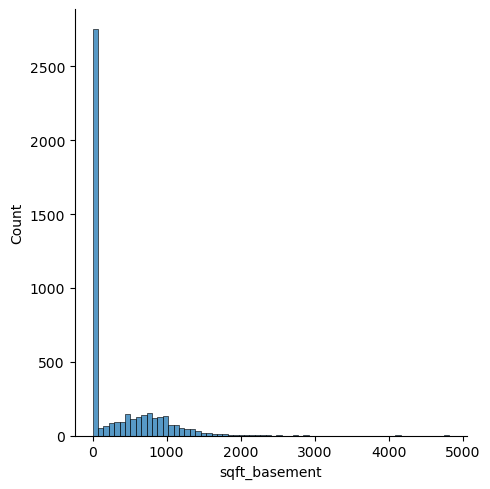

yr_built
-0.5019914288959365


<Figure size 640x480 with 0 Axes>

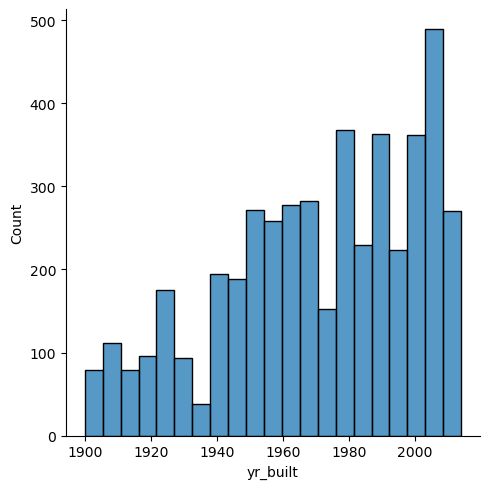

yr_renovated
0.38579284642777756


<Figure size 640x480 with 0 Axes>

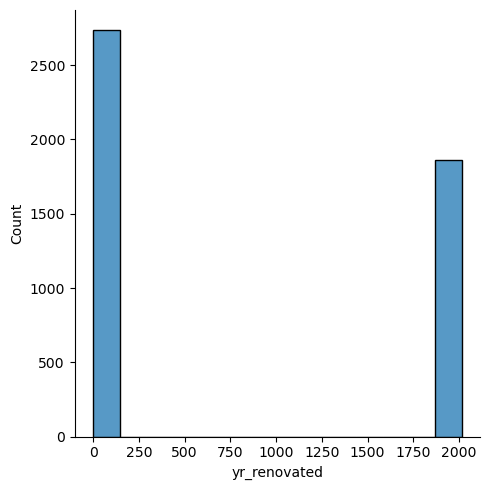

In [64]:
for i in x[col]:
    print(i)
    print(skew(x[i]))
    
    plt.figure()
    sns.displot(x[i])
    plt.show()

In [65]:
df['price_log'] = np.log(df['price'])

In [66]:
df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_lot_log'] = np.log(df['sqft_lot'])
df['waterfront_log'] = np.log(df['waterfront'])
df['view_log'] = np.log(df['view'])
df['sqft_above_log'] = np.log(df['sqft_above'])
df['sqft_basement_log'] = np.log(df['sqft_basement'])

In [67]:
skew(df['price_log'])

0.3215775387897161

## Encoding

In [68]:
cat_col=x.select_dtypes(object)
cat_col

,date,street,city,statezip
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...
4595,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133
4596,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007
4597,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059
4598,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178


In [69]:
from sklearn.preprocessing import OrdinalEncoder

In [70]:
od=OrdinalEncoder()
od.fit_transform(x[['date','street','city','statezip']])

array([[   0., 1522.,   36.,   62.],
       [   0., 3899.,   35.,   58.],
       [   0., 2291.,   18.,   26.],
       ...,
       [  68., 4033.,   32.,   37.],
       [  69., 3498.,   35.,   71.],
       [  69., 1514.,    9.,   26.]])

In [71]:
cat_col = x.select_dtypes(object).columns
cat_col

Index(['date', 'street', 'city', 'statezip'], dtype='object')

In [72]:
x[cat_col]=od.fit_transform(x[cat_col])

In [73]:
x[cat_col]

,date,street,city,statezip
0,0.0,1522.0,36.0,62.0
1,0.0,3899.0,35.0,58.0
2,0.0,2291.0,18.0,26.0
3,0.0,4263.0,3.0,7.0
4,0.0,4352.0,31.0,31.0
...,...,...,...,...
4595,68.0,3447.0,35.0,62.0
4596,68.0,960.0,3.0,6.0
4597,68.0,4033.0,32.0,37.0
4598,69.0,3498.0,35.0,71.0


### Split the data into training and testing

In [74]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

## Predicting by using Linear Regression Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

### Model Evaluation

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f'mae : {mae}\nmse : {mse}\nrmse : {rmse}\naccuracy : {r2}')

mae : 160131.65279644172
mse : 60959145124.36042
rmse : 246899.05857325665
accuracy : 0.5170684615861645


### The linear regression model yielded a moderate accuracy of 52% in predicting house prices. 